## Contextualized Topic Model

### Import data

In [1]:
import json

with open('swl_optimum.txt', 'r', encoding='utf-8') as f:
    swl = f.read().split('\n')
    swl.append(['все', 'еще', 'год', 'есть', 'быть', 'мочь'])

with open('raw_texts.json', 'r') as f:
    docs = json.load(f)
    docs_clean = [[word for word in doc if word not in swl and len(word) > 2] 
                  for doc in docs]
    texts = [' '.join(doc) for doc in docs_clean]

### Create a dataset to train the model

In [2]:
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation

sp = WhiteSpacePreprocessingStopwords(texts, 'russian')
preprocessed_documents, unpreprocessed_documents, vocab = sp.preprocess()

In [3]:
bert_model = 'distiluse-base-multilingual-cased-v1'

In [4]:
# Initialize a contextualized model
qt = TopicModelDataPreparation(bert_model)

# Create the training set
training_dataset = qt.fit(text_for_contextual=unpreprocessed_documents, \
                          text_for_bow=preprocessed_documents)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

### Train and run the ZeroShot topic model

In [7]:
from contextualized_topic_models.models.ctm import ZeroShotTM

# Train the model
num_topics = 10
ctm_zero = ZeroShotTM(bow_size=len(qt.vocab), contextual_size=512, \
                      n_components=num_topics, num_epochs=50)

# Run the model
ctm_zero.fit(training_dataset)

Epoch: [50/50]	 Seen Samples: [63000/63000]	Train Loss: 4253.784995039682	Time: 0:00:20.905695: : 50it [17:26, 20.93s/it] 
Sampling: [20/20]: : 20it [06:22, 19.15s/it]


### Print the results

In [8]:
ctm_zero.get_topics(15)

defaultdict(list,
            {0: ['ген',
              'эволюционныи',
              'животное',
              'геном',
              'группа',
              'эволюция',
              'есть',
              'развитие',
              'предок',
              'ветвь',
              'быть',
              'древнии',
              'многоклеточныи',
              'современныи',
              'hox'],
             1: ['год',
              'земля',
              'затмение',
              'планета',
              'время',
              'звезда',
              'фаза',
              'океан',
              'порода',
              'период',
              'поверхность',
              'слои',
              'солнечныи',
              'полныи',
              'земнои'],
             2: ['приходить',
              'собранныи',
              'знакомыи',
              'испытывать',
              'поведенческии',
              'канада',
              'реконструкция',
              'жертва',
              'вне

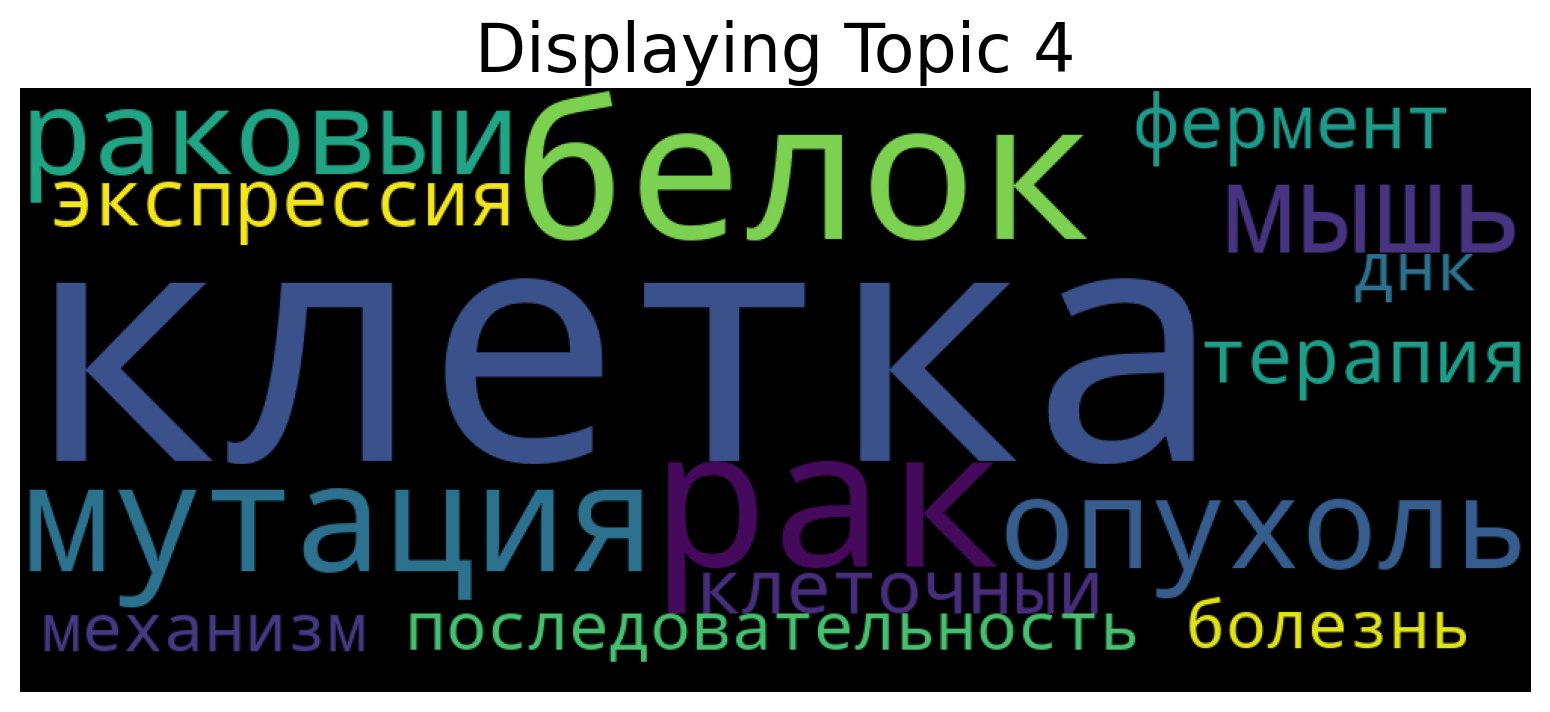

In [9]:
ctm_zero.get_wordcloud(topic_id=4, n_words=15)

### Train and run the Combined topic model

In [10]:
from contextualized_topic_models.models.ctm import CombinedTM

# Train the model
num_topics = 10
ctm_comb = CombinedTM(bow_size=len(qt.vocab), contextual_size=512, \
                      n_components=num_topics, num_epochs=50)

# Run the model
ctm_comb.fit(training_dataset)

Epoch: [50/50]	 Seen Samples: [63000/63000]	Train Loss: 4192.4945188492065	Time: 0:00:19.247646: : 50it [16:07, 19.36s/it]
Sampling: [20/20]: : 20it [06:08, 18.43s/it]


### Print the results

In [13]:
ctm_comb.get_topics(15)

defaultdict(list,
            {0: ['частица',
              'физика',
              'два',
              'новыи',
              'материя',
              'быть',
              'протон',
              'энергия',
              'гравитационныи',
              'стандартныи',
              'результат',
              'эксперимент',
              'физик',
              'распад',
              'коллаидер'],
             1: ['целиком',
              'британскии',
              'проявляться',
              'переходить',
              'четко',
              'коррелировать',
              'регистрировать',
              'предмет',
              'потерять',
              'разобраться',
              'немецкии',
              'лето',
              'генныи',
              'успешныи',
              'ввести'],
             2: ['xix',
              'будущии',
              'спектральныи',
              'коррелировать',
              'облако',
              'целиком',
              'лето',
              '

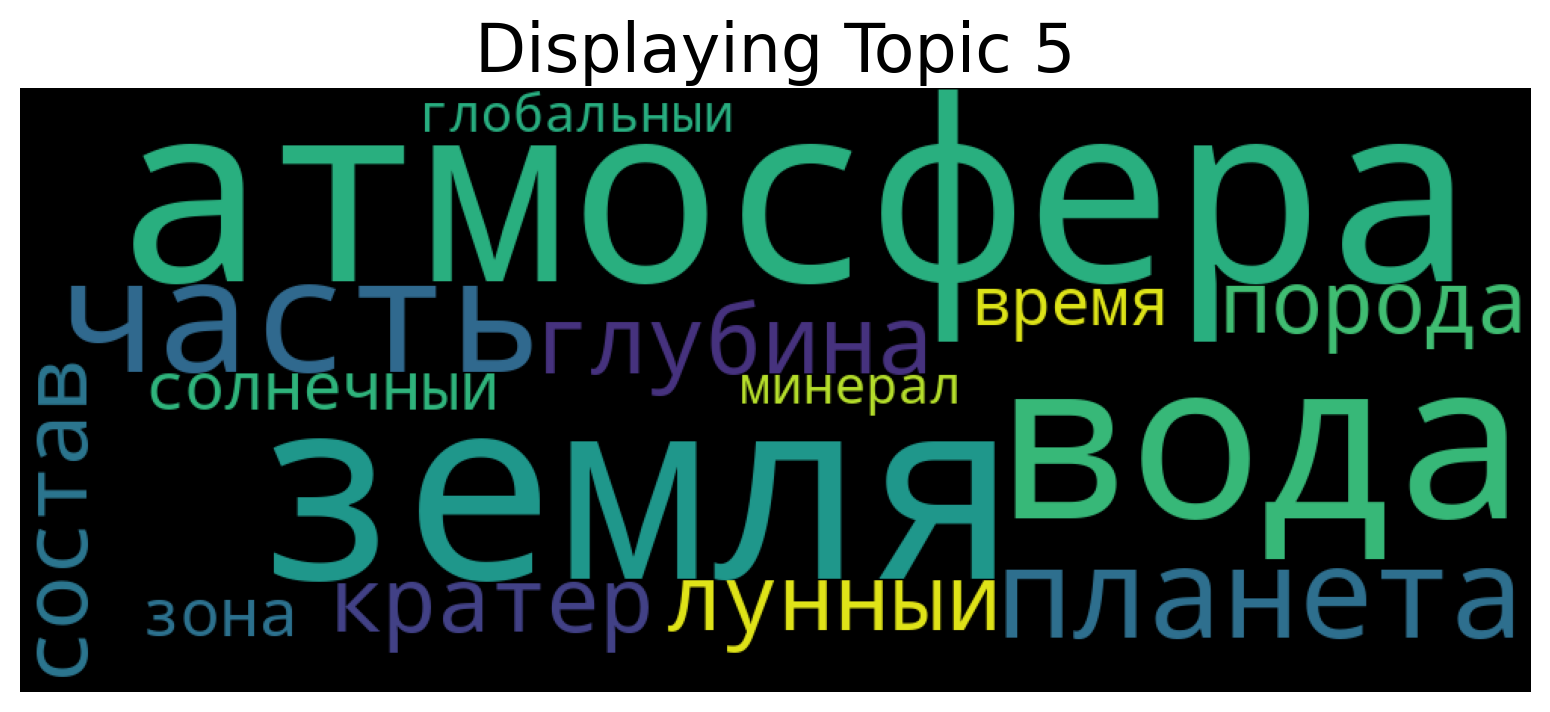

In [12]:
ctm_comb.get_wordcloud(topic_id=5, n_words=15)